<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/weightedFrequentRegularPatterns/basic/WFRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Weighted Frequent Regular Patterns in Big Data Using WFRIM Algorithm

In this tutorial, we will discuss two approaches to find weighted frequent regular patterns in big data using WFRIM algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover weighted frequent regular patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing WFRIM on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [ ]:
!pip install -U PAMI

#### Step 1: Import the WFRIM algorithm

In [ ]:
from PAMI.weightedFrequentRegularPattern.basic import WFRIMiner as alg

#### Step 2: Specify the following input parameters

In [ ]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
weightFile = 'T10_weights.txt'
minimumSupportCount = 500  #Users can also specify this constraint between 0 to 1.
regularity=3000
seperator='\t'

#### Step 3: Execute the WFRIM algorithm

In [ ]:
obj = alg.WFRIMiner(iFile=inputFile, _wFile=weightFile, WS=minimumSupportCount, regularity=regularity,  sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [ ]:
obj.save('weightedRegularPatternsMinSupCount500.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [ ]:
weightedRegularPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [ ]:
print('Total No of patterns: ' + str(len(weightedRegularPatternsDF)))

Total No of patterns: 1202


##### Step 5.2: Runtime consumed by the mining algorithm

In [ ]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 13.080559253692627


##### Step 5.3: Total Memory consumed by the mining algorithm

In [ ]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 568975360
Memory (USS): 530284544


# Advanced Tutorial on Implementing WFRIM Algorithm

In this tutorial, we will discuss second approach to find frequent patterns in big data using WFRIM algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover weighted frequent regular patterns using multiple minimum support values.

***

### In this tutorial, we explain how the WFRIM algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the WFRIM algorithm and pandas data frame

In [ ]:
from PAMI.weightedFrequentRegularPattern.basic import WFRIMiner as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [ ]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
weightFile = 'T10_weights.txt'
seperator='\t'
minimumSupportCountList = [100, 200, 300, 400, 500]
regularity = 2000
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FSPGrowth algorithm

#### Step 3: Execute the WFIM algorithm using a for loop

In [ ]:
algorithm = 'WFRIM'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.WFRIMiner(inputFile, _wFile=weightFile, WS=minSupCount, regularity=regularity, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm
Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm
Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm
Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm
Weighted Frequent Regular patterns were generated successfully using WFRIM algorithm


In [ ]:
print(result)

  algorithm  minSup  patterns    runtime     memory
0     WFRIM     100      4648  13.104086  561823744
1     WFRIM     200      4642  12.983847  563023872
2     WFRIM     300      3561  12.527540  562970624
3     WFRIM     400      1989  12.436150  562225152
4     WFRIM     500      1154  12.188757  561946624


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [ ]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

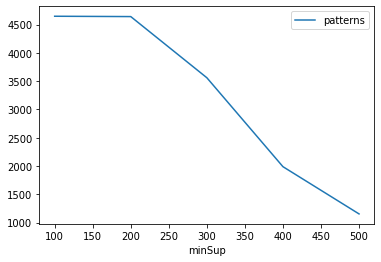

Graph for No Of Patterns is successfully generated!


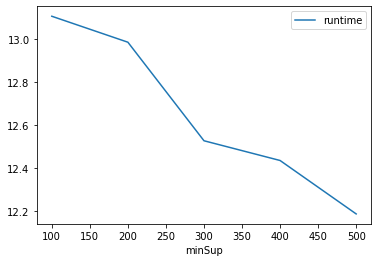

Graph for Runtime taken is successfully generated!


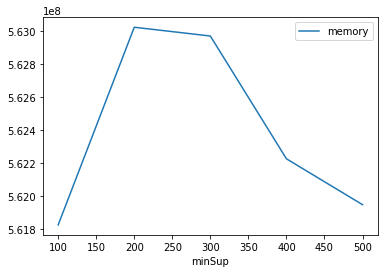

Graph for memory consumption is successfully generated!


In [ ]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [ ]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
